# Cryptocurrency data analysis and price prediction using ARIMA and Seasonal ARIMA model
#### Project Proposal

## 1. Aims, objective and background
### 1.1 Introduction
Cryptocurrencies are quickly challenging traditional currencies throughout the world. Digital currencies may be purchased in a variety of ways, making them accessible to everyone, and merchants adopting multiple cryptocurrencies could signal that money as we know it is about to undergo a huge transformation.

Bitcoin was the first cryptocurrency launched in the year 2009 and since then the popularity and acceptibility of blockchain and cryptocurrencies has only grown upward direction. Due to its unique qualities of blockchain, such as security and transparency, cheaper cost and decentralisation, it is already being used to solve variety of real world problems as per Mallqui and Fernandes [5].

This project was inspired by Chaudhari, A. (2020, June 11). Forecasting Cryptocurrency Prices using Machine Learning [3] and Chakrabarti, S. (2021, December 3). Cryptocurrency Price Prediction using ARIMA Model [4]. The authors used data science ARIMA, LSTM and Prophet models to predict the cryptocurrency prices.

Currently the interest of investing in crypto is growning rapidly and there is less information about crypto relative to our traditional trading and this is a new platform for me researching. I love to research new things. So, I have decided to focus on next few months price prediction of top 4 cryptocurrencies.

### 1.2 Aims and objectives
For this project I would like to exlpore following things
1. Analysing of history data of cryptocurrency.
2. Using history data making visualizations (graphs)
3. Looking for relationship of the graphs.
4. Checking the instantaneous move of one coin (BTC) affect others.
5. Using (Autoregressive integrated moving average) model and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model for predicting next months prices.

For this project my aims are
1. Decide how much history data is required to use ARIMA and SARIMAX models.
2. Decide which currencies will be best for my project.
3. Collecting data via API/wesrapping and storing in better format so that I can do data cleaning.
4. Clean the scraped or API history data suitable for data analysis
5. Perform some data analysis to see if there are any trends in the data that may be helpful for future investigation.
6. Calculate the accuracy of price predication.

### 1.3 Data
#### 1.3.1 Data requirement
Right now there are more than 6000 crypto coins in the market. Taking consideration of time and resource. I have chosen to work on top 4 crypto coins to explore.
I have decided to have equal number of history data for the coins and going to use data from one website because there are lot of exchanges and each exchange have slight differences.

#### 1.3.2 Choice of history data website
For the history data of coins, I am going to choose 1 website but first I made a list of good sources.

1) www.investing.com        Scrapping / No API
2) www.coinmarketcap.com    No Scrapping / API
3) www.coingecko.com        No Scrapping / API
4) www.coinpaprika.com      No Scrapping / API

In this list only www.investing.com allowed data scrapping and other websites allowed on APIs only. API will be easy to collect data but then I will not able to use my new ability to scrap data. So, I am choosing www.investing.com [1].

#### 1.3.3 Choice of the cryptocurrencies: methodology
First point for choosing the currency will be the enough history data for analysis. Keeping the coin not related to each other. After it we need to check their rank [7], daily volume.

Following are the selected coins:
1) Bitcoin (BTC)
2) Ethereum (ETH)
3) Cardano (ADA)
4) XRP (XRP)

Originally I have choosen top 4 currencies but some don't have enough history for analysis and some are related to other currencies. They may have affected each other with the price change. So, I have skipped Binance Coin (BNB) and Solana (SOL).

#### 1.3.4 Limitations and constraints of the data
In this project I am going to use last 3 years of history data with per day value for analyase. This means I not going to use data from when the coin initiated in the market and this data not going to be per second/minute it will be per day.

For analysing large data (per second or per minutes) will cause lot longer time for scrapping, cleaning and analysing the data. So, taking the account of limited time and resources I am going to use per day history values.

Everyone know there are different event happened and it may have caused the price fluctuations, for example last few days everyone knows COVID caused lot of sudden fall in all the markets.

### 1.4 Ethical considerations
#### 1.4.1 Use of cryptocurrency history data
www.investing.com allows to use their data but only ask to make sure to include full disclosure to Investing.com brand, logo, watermark and links if possible [1].

#### 1.4.2 Onward use / reuseage and derived data
Anyone wishing to use the source data must follow the term and conditions of www.investing.com and should take indiidual permission if necessary. The same term and condition apply to data producted from source data.

Analysis and conclusions are my own.

#### 1.4.3 Potential impacts of using cryptocurrency data for the proposes analyses
Doing analysis of the source data may cause negative effect on the traders/cryptocurrencies. This may potential losses.
1. Rather than making judgments on the currency will grow or fall. This project only focus on analysing objective.
2. The project's findings will not claim to be a fully representative analysis. Limitations of data are outlined above. Limitations of techniques will be discussed further project.



In [122]:
# Importing libraries and modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import scipy as scipy
import seaborn as sns

import datetime
from datetime import date
from datetime import timedelta

# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

## 2. Web Scraping cryptocurrencies history data
### 2.1 Defining scraping and extraction functions
There going to be 3 years data for each coin.

1) Bitcoin (BTC)
2) Ethereum (ETH)
3) Cardano (ADA)
4) XRP (XRP)

Before importing the data we need to make a function to iterate over the 4 urls.
All the data of each coin going to be on 1 page so, data scraping will take few seconds. So, we don't need to worry about getting blocked or blacklisted.

Below function will check if the website is accessible and returns the content.

In [123]:
today = date.today()
today = date.strftime(today, '%d/%m/%Y')

# coinInfo dataframe includes required values to scrap data from Investing.com
coinInfo = { 'bitcoin': {'name': 'bitcoin', 'symbol': 'BTC', 'curr_id': 1057391, 'smlID': 25609848},
            'ethereum': {'name': 'ethereum', 'symbol': 'ETH', 'curr_id': 1061443, 'smlID': 25674078},
            'cardano': {'name': 'cardano', 'symbol': 'ADA', 'curr_id': 1062537, 'smlID': 25948924},
            'xrp': {'name': 'xrp', 'symbol': 'XRP', 'curr_id': 1057392, 'smlID': 25674343},}

# getParsedWebPage function will scrap data from Investing.com and convert it to dataframe
# Date format should in 'DD/MM/YYYY"
# All the prices are in US dollar

def getParsedWebPage(coinName, from_date, to_date):

    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36", "X-Requested-With": "XMLHttpRequest"}

    url = "https://in.investing.com/instruments/HistoricalDataAjax"
    header = 'null'

    payload = {'header': header,
               'st_date': from_date, 'end_date': to_date,
               'sort_col': 'date', 'action': 'historical_data',
               'smlID': coinInfo[coinName], 'sort_ord': 'DESC', 'interval_sec': 'Daily', 'curr_id': coinInfo[coinName]['curr_id']}

    res = requests.post(url, headers=headers, data=payload)

    # Check that page is accessible for scraping
    if res.status_code != 200:
        soup = 'error'
    else:
        soup = BeautifulSoup(res.content, "lxml")
        table = soup.find('table', id="curr_table")
        df = pd.read_html(str(table))[0]

    # Adding Coin symbol and rearranging the columns
    df['Symbol'] = coinInfo[coinName]['symbol']
    df.rename(columns={'Vol.': 'Volume'}, inplace=True)
    df = df[['Date', 'Symbol', 'Price', 'Open', 'High', 'Low', 'Volume']]
    return df

### 2.1 Scraping the data
We are going to scrap last 3 years data using function getParsedWebPage and appending all coins data in one dataframe. I am going to use from_date 365*3 = 1095 days before yesterday and to_date going to be yesterday because today's market may be not closed yet.

In [124]:
# Date format should in 'DD/MM/YYYY"
# from_date = '21/12/2018'
# to_date = '21/12/2021'

today = date.today()

yesterday = date.today() - timedelta (days = 1)

to_date = yesterday
from_date = yesterday - timedelta (days = 1095)

# Modifying the date format
from_date = date.strftime(from_date, '%d/%m/%Y')
to_date = date.strftime(yesterday, '%d/%m/%Y')

coinsHistoryDF = pd.DataFrame()

# Scraping and appending the coin data in one DataFrame
for coin in coinInfo:
    coinData = getParsedWebPage(coin, from_date, to_date)
    coinsHistoryDF = coinsHistoryDF.append(coinData, ignore_index=True)

### 2.2 Check Scraped data
We need to ensure that was scraped correctly and it does not go outside the required bounds.

We're going to check the row count, ensure that it contains all the scraped coins and all values are not null.

In [125]:
print(coinsHistoryDF.info())

print("\nUnique coin symbols")
print(coinsHistoryDF.Symbol.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4384 non-null   object 
 1   Symbol  4384 non-null   object 
 2   Price   4384 non-null   float64
 3   Open    4384 non-null   float64
 4   High    4384 non-null   float64
 5   Low     4384 non-null   float64
 6   Volume  4384 non-null   object 
dtypes: float64(4), object(3)
memory usage: 239.9+ KB
None

Unique coin symbols
['BTC' 'ETH' 'ADA' 'XRP']


### 2.3 Import previously scraped data
Because the history data of cryptocurrencies are being stored for long term and the content is not modified except in unavoidable circumstances, there is danger of altering the history data of the coins is very low but there is still change of modifications will occur on following

1. Changes in Website content, design, AJAX calls
2. History data may get removed
3. Some reason if coin get banned and government may ask to remove all its content
4. The website where we are scrapping it may go down due to some bugs

If we keep our previously scraped data then such things will not happen and it will ensure of project consistent.

In [126]:
# Saving previously scraped data in a csv file
# All the prices are in US dollar

# coinsHistoryDF.to_csv('coinsHistory.csv')

In [127]:
# Read previously scraped data
coinsHistoryCSV = pd.read_csv('coinsHistory.csv', index_col=0)

In [128]:
# Previously scraped data should be the same as freshly scraped data
(coinsHistoryCSV == coinsHistoryDF).describe()
coinsHistoryCSV

,Date,Symbol,Price,Open,High,Low,Volume
0,"Dec 27, 2021",BTC,51698.60000,50783.60000,52016.30000,50459.00000,40.40K
1,"Dec 26, 2021",BTC,50779.90000,50404.00000,51247.00000,49527.00000,32.34K
2,"Dec 25, 2021",BTC,50406.40000,50789.60000,51140.20000,50196.80000,26.67K
3,"Dec 24, 2021",BTC,50786.10000,50807.40000,51795.30000,50428.40000,45.97K
4,"Dec 23, 2021",BTC,50801.00000,48599.60000,51355.60000,48053.40000,56.24K
...,...,...,...,...,...,...,...
4379,"Jan 01, 2019",XRP,0.36326,0.35100,0.36328,0.34803,187.50M
4380,"Dec 31, 2018",XRP,0.35100,0.36759,0.37198,0.34726,243.20M
4381,"Dec 30, 2018",XRP,0.36759,0.35945,0.36778,0.35439,198.71M
4382,"Dec 29, 2018",XRP,0.35945,0.37364,0.38199,0.35789,319.80M


## 3. Data cleaning
Data cleaning is only needed for 'Volume' column as there is 'K', 'M' and 'B' at the end of the numbers. I will multiply the values with relative factor and remove the 'K', 'M' and 'B'.

In [129]:
# Replacing the K M and B with 1000, 1000000 and 1000000000
def strToNum(strNum):
    num = 0
    num_map = {'K':1000, 'M':1000000, 'B':1000000000}
    if str(strNum).isdigit():
        num = int(strNum)
    else:
        if len(strNum) > 1:
            num = float(strNum[:-1]) * num_map.get(strNum[-1].upper(), 1)
    return int(num)

for i, row in coinsHistoryCSV.iterrows():
    row = strToNum(coinsHistoryCSV['Volume'][i])
    coinsHistoryCSV.iat[i, 6] = row

coinsHistoryCSV['Volume $'] = coinsHistoryCSV['Volume'] * coinsHistoryCSV['Price']

## 4. Visual representation of data
Visual representation is a picture or detailed illustration, It is an accurate depiction of given numbers and their relationships.

### 4.1 Volume
Volume or trading volume, is a total number of a cryptocurrencies that was traded during a given period of time.
For this project time period is a day.

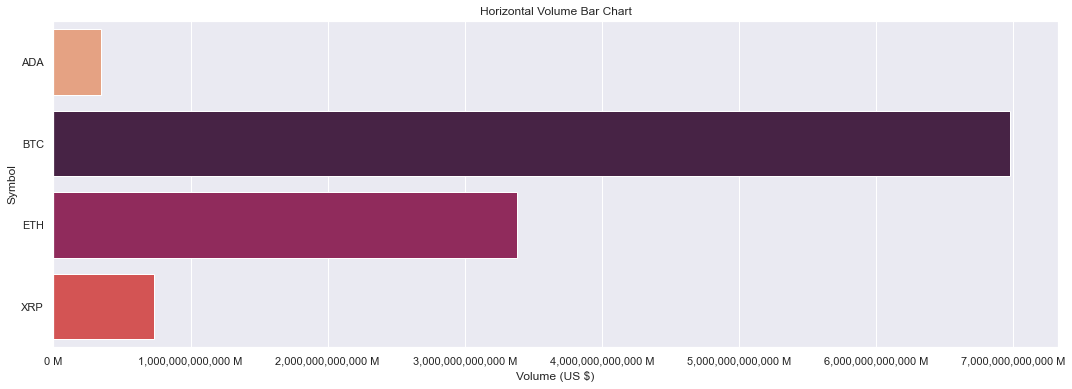

In [130]:
# Plotting volume graph for BTC, ETH, ADA and XRP cryptocurrencies

volumeSumDF = coinsHistoryCSV.groupby(['Symbol'])['Volume $'].sum().reset_index()
volumeRank = np.array( volumeSumDF['Volume $'].argsort())


fig, ax = plt.subplots(figsize=(18,6))

# Generating color palette
colorPalette = sns.color_palette("rocket", len(volumeSumDF))

# Using seaborn and matplotlib creating barplot graph info
g = sns.barplot( y = volumeSumDF['Symbol'], x = volumeSumDF['Volume $'], palette=np.array(colorPalette[::-1])[volumeRank], ci = None)

# Labels
plt.title("Horizontal Volume Bar Chart")
ax.set_xlabel('Volume (US $)')

label_format = '{:,.00f} M'

# fixing yticks with matplotlib.ticker "FixedLocator"
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])

# Converting barplot graph info into a image
fig=plt.gcf()
plt.show()

## 7. References and Resources
### 7.1 References
[1]: Use our data. (n.d.). Investing Support. https://www.investing-support.com/hc/en-us/articles/360002357417
[2]: FRANKENFIELD, J. A. K. E. (2021, December 20). Cryptocurrency. Investopedia. https://www.investopedia.com/terms/c/cryptocurrency.asp
[3]: Chaudhari, A. (2020, June 11). Forecasting Cryptocurrency Prices using Machine Learning - NORMA@NCI Library. Norma.Ncirl.Ie. http://norma.ncirl.ie/4272/
[4]: Chakrabarti, S. (2021, December 3). Cryptocurrency Price Prediction using ARIMA Model. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/12/cryptocurrency-price-prediction-using-arima-model/
[5]: Mallqui, D., & Fernandes, R. (2019b, February 1). Predicting the direction, maximum, minimum and closing prices of daily Bitcoin exchange rate using machine learning techniques. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S1568494618306707
[6]: George, D. (2021, December 14). A Brief Introduction to ARIMA and SARIMAX Modeling in Python. Medium. https://medium.com/swlh/a-brief-introduction-to-arima-and-sarima-modeling-in-python-87a58d375def.

[7]: CoinMarketCap. (n.d.-b). Today’s Top 100 Crypto Coins Prices And Data. Retrieved December 26, 2021, from https://coinmarketcap.com/coins/

[8]: Rai, A. (2021, December 11). Python utility for data scrapping historical financial data- ML Data mining. Medium. https://medium.datadriveninvestor.com/python-utility-for-data-scrapping-historical-financial-data-ml-data-mining-5396dfe6f38c

[9]: Wikipedia contributors. (2021, October 27). Volume (finance). Wikipedia. https://en.wikipedia.org/wiki/Volume_(finance)


### 7.2 Resources used